# Setup

Test run:
* Feature selection (ANOVA)
* Pipeline (standard scaler & ML model)
* 10-fold cross-validation (cv=10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif, SelectKBest

%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [4]:
df_y = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df_y.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
df_X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
df_X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [6]:
y = df_y['Class'].to_numpy()
type(y)

numpy.ndarray

In [7]:
X = df_X.to_numpy()
type(X)

numpy.ndarray

In [8]:
X.shape, y.shape

((90, 83), (90,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72, 83), (18, 83), (72,), (18,))

# Feature Selection

In [11]:
select_prelim = SelectKBest(score_func=f_classif, k=round(0.2*X_train.shape[1]))
select_prelim.fit(X_train, y_train)

c:\program files\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 8 22 24 27 35 37 38 45 47 57] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\program files\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=17)

In [12]:
df_selected = pd.DataFrame({"feature": [], "F-score": [], "p-value": []})
df_selected["feature"] = df_X.columns.to_list()
df_selected["F-score"] = select_prelim.scores_
df_selected["p-value"] = select_prelim.pvalues_
df_selected = df_selected.sort_values("F-score", ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

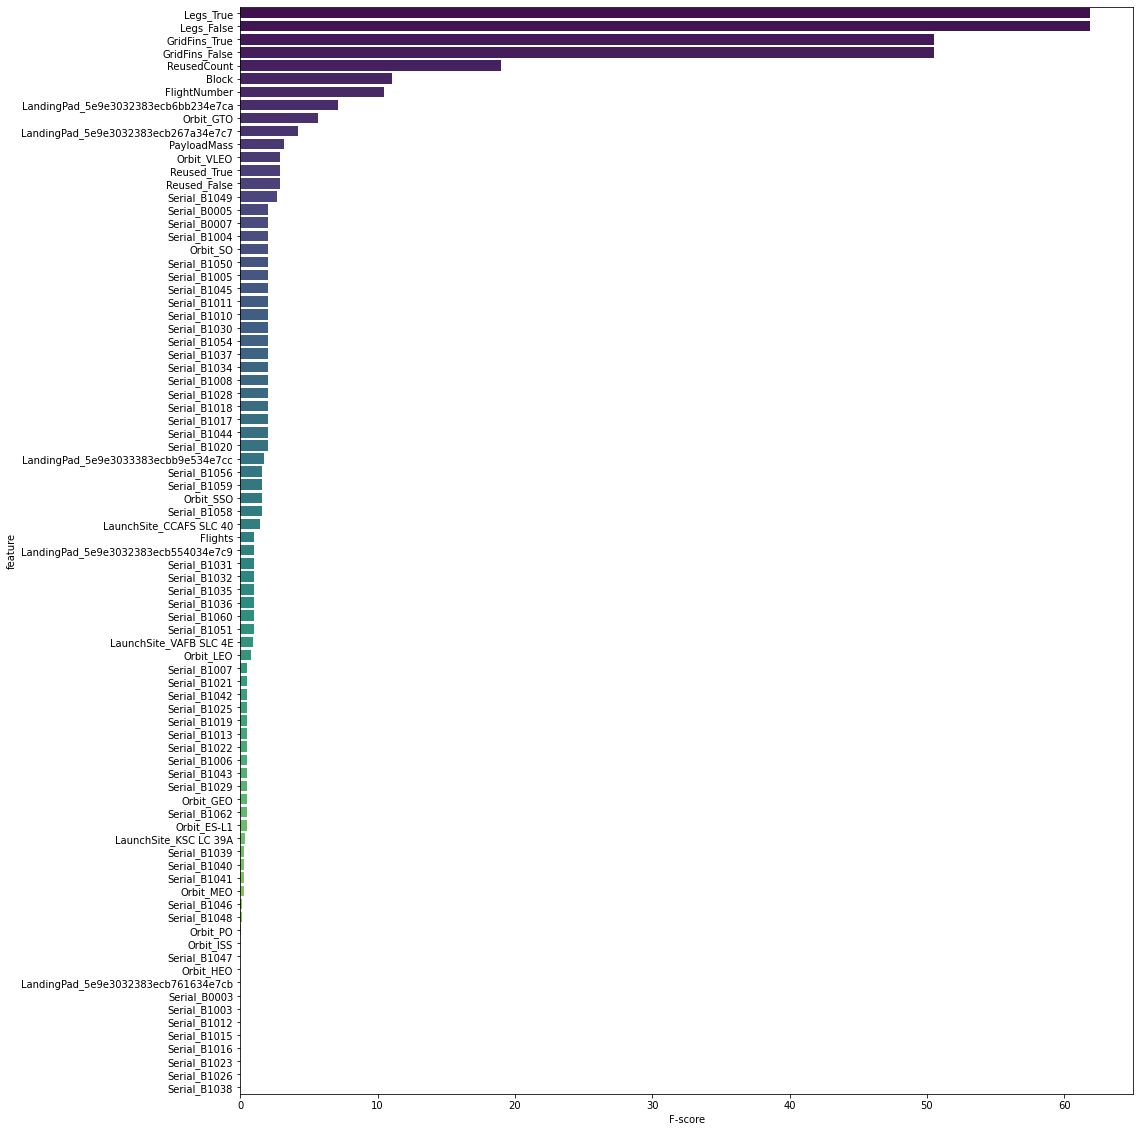

In [13]:
fig, ax = plt.subplots(figsize=(16,20))
sns.barplot(x="F-score", y="feature", data=df_selected.sort_values("F-score", ascending=False), palette="viridis", ax=ax)
plt.show

In [14]:
df_selected = df_selected[df_selected["p-value"] <= 0.05]
df_selected

,feature,F-score,p-value
82,Legs_True,61.903260,3.199043e-11
81,Legs_False,61.903260,3.199043e-11
78,GridFins_True,50.534070,7.910300e-10
77,GridFins_False,50.534070,7.910300e-10
4,ReusedCount,18.969331,4.450981e-05
3,Block,11.052286,1.412194e-03
0,FlightNumber,10.442572,1.878208e-03
21,LandingPad_5e9e3032383ecb6bb234e7ca,7.142857,9.356667e-03
7,Orbit_GTO,5.673861,1.994098e-02
19,LandingPad_5e9e3032383ecb267a34e7c7,4.172185,4.486052e-02


In [15]:
select = SelectKBest(score_func=f_classif, k=df_selected.shape[0])
select.fit(X_train, y_train)

c:\program files\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 8 22 24 27 35 37 38 45 47 57] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\program files\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest()

In [16]:
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)
print("Original number of features:\t{}".format(X_train.shape[1]))
print("Reduced number of features:\t{}".format(X_train_selected.shape[1]))

Original number of features:	83
Reduced number of features:	10


# Logistic Regression

Best cross-validation accuracy: 0.8607
Test set score: 0.8333
Best parameters: {'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}


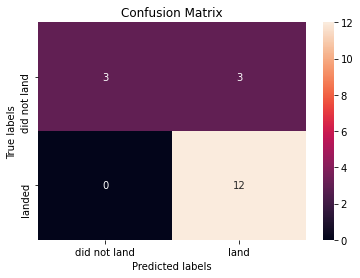

In [17]:
pipe_lr = Pipeline([("scaler", StandardScaler()), ("lr", LogisticRegression())])
param_lr ={"lr__C":[0.001, 0.01, 0.1, 1, 10, 100],'lr__penalty':['l2'], 'lr__solver':['lbfgs']}
grid_lr = GridSearchCV(pipe_lr, param_grid=param_lr, cv=10)
grid_lr.fit(X_train_selected, y_train)

print("Best cross-validation accuracy: {:.4f}".format(grid_lr.best_score_))
print("Test set score: {:.4f}".format(grid_lr.score(X_test_selected, y_test)))
print("Best parameters: {}".format(grid_lr.best_params_))

y_hat_lr = grid_lr.predict(X_test_selected)
plot_confusion_matrix(y_test, y_hat_lr)

# Support Vector Machine

Best cross-validation accuracy: 0.8750
Test set score: 0.8333
Best parameters: {'svm__C': 0.001, 'svm__gamma': 1.0, 'svm__kernel': 'poly'}


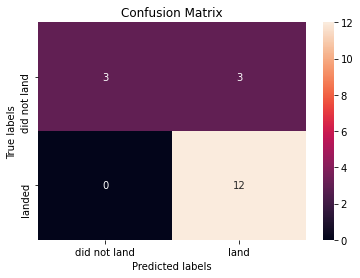

In [18]:
pipe_svm = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])
param_svm = {'svm__kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'svm__C': np.logspace(-3, 3, 5),
              'svm__gamma':np.logspace(-3, 3, 5)}
grid_svm = GridSearchCV(pipe_svm, param_grid=param_svm, cv=10)
grid_svm.fit(X_train_selected, y_train)

print("Best cross-validation accuracy: {:.4f}".format(grid_svm.best_score_))
print("Test set score: {:.4f}".format(grid_svm.score(X_test_selected, y_test)))
print("Best parameters: {}".format(grid_svm.best_params_))

y_hat_svm = grid_svm.predict(X_test_selected)
plot_confusion_matrix(y_test, y_hat_svm)

# Decision Tree

Best cross-validation accuracy: 0.9000
Test set score: 0.8333
Best parameters: {'dt__criterion': 'entropy', 'dt__max_depth': 14, 'dt__max_features': 'auto', 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 10, 'dt__splitter': 'random'}


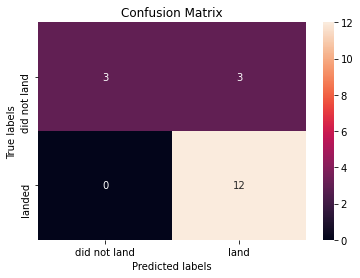

In [19]:
pipe_dt = Pipeline([("scaler", StandardScaler()), ("dt", DecisionTreeClassifier())])
param_dt = {'dt__criterion': ['gini', 'entropy'],
     'dt__splitter': ['best', 'random'],
     'dt__max_depth': [2*n for n in range(1,10)],
     'dt__max_features': ['auto', 'sqrt'],
     'dt__min_samples_leaf': [1, 2, 4],
     'dt__min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(pipe_dt, param_grid=param_dt, cv=10)
grid_dt.fit(X_train_selected, y_train)

print("Best cross-validation accuracy: {:.4f}".format(grid_dt.best_score_))
print("Test set score: {:.4f}".format(grid_dt.score(X_test_selected, y_test)))
print("Best parameters: {}".format(grid_dt.best_params_))

y_hat_dt = grid_dt.predict(X_test_selected)
plot_confusion_matrix(y_test, y_hat_dt)

# K-Nearest Neighbors

Best cross-validation accuracy: 0.8339
Test set score: 0.7222
Best parameters: {'knn__algorithm': 'auto', 'knn__n_neighbors': 5, 'knn__p': 2}


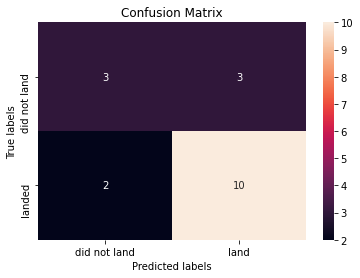

In [20]:
pipe_knn = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])
param_knn = {'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'knn__p': [1,2]}
grid_knn = GridSearchCV(pipe_knn, param_grid=param_knn, cv=10)
grid_knn.fit(X_train_selected, y_train)

print("Best cross-validation accuracy: {:.4f}".format(grid_knn.best_score_))
print("Test set score: {:.4f}".format(grid_knn.score(X_test_selected, y_test)))
print("Best parameters: {}".format(grid_knn.best_params_))

y_hat_knn = grid_knn.predict(X_test_selected)
plot_confusion_matrix(y_test, y_hat_knn)

# Summary

In [21]:
print("Logistic Regression score:\t{:.4f}".format(grid_lr.score(X_test_selected, y_test)))
print("Support Vector Machine score:\t{:.4f}".format(grid_svm.score(X_test_selected, y_test)))
print("Decision Tree score:\t\t{:.4f}".format(grid_dt.score(X_test_selected, y_test)))
print("K-Nearest Neighbors score:\t{:.4f}".format(grid_knn.score(X_test_selected, y_test)))

Logistic Regression score:	0.8333
Support Vector Machine score:	0.8333
Decision Tree score:		0.8333
K-Nearest Neighbors score:	0.7222
